In [15]:
%pip install statsmodels feature-engine

Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from pathlib import Path

pd.set_option("display.max_columns", 500)

np.random.seed(2137) 


In [17]:
df = pd.read_csv('appartments_train.csv', index_col = 'unit_id')
df.index.name = None

df.sample(10)

,obj_type,dim_m2,n_rooms,floor_no,floor_max,year_built,dist_centre,n_poi,dist_sch,dist_clinic,dist_post,dist_kind,dist_rest,dist_uni,dist_pharma,own_type,build_mat,cond_class,has_park,has_balcony,has_lift,has_sec,has_store,price_z,src_month,loc_code,market_volatility,infrastructure_quality,neighborhood_crime_rate,popularity_index,green_space_ratio,estimated_maintenance_cost,global_economic_index
78a1de0708226437,NaN,48.83,2.0,1.0,3.0,1998.0,7.846,11.0,0.234,0.171,0.623,0.222,0.629,1.739,0.101,12631efb,7ceffe3b,53cced8d,yes,yes,no,no,yes,704287.28,2024-03,693f303c,800711.71,32.67,48.48,62.38,0.999,9.04,105.668549
115a285f1e8bbc20,0d6c4dfc,35.53,2.0,3.0,4.0,1970.0,3.960,8.0,0.294,2.154,0.848,0.286,0.268,0.316,0.255,12631efb,7f8c00f9,53cced8d,no,no,no,no,yes,313238.60,2023-08,8d5a4f0c,258100.50,37.87,26.23,48.00,1.000,3.88,104.927936
a76803b46f21fb29,0d6c4dfc,25.87,2.0,3.0,4.0,1963.0,6.563,23.0,0.267,0.552,0.074,0.329,0.090,1.316,0.061,12631efb,7ceffe3b,NaN,no,yes,no,no,yes,493304.86,2024-04,e0cff11b,409311.56,75.92,17.89,50.33,0.999,12.23,90.167666
6424c0db2a193b6b,0d6c4dfc,58.98,3.0,NaN,3.0,2022.0,4.714,10.0,0.317,2.250,1.087,0.264,0.152,2.146,0.569,12631efb,7ceffe3b,NaN,no,yes,yes,no,no,1991412.59,2023-10,693f303c,2008616.80,1.00,3.01,38.72,1.000,23.90,94.343251
390664e65d2bd159,0c238f18,51.72,2.0,3.0,3.0,NaN,0.593,121.0,0.016,0.108,0.258,0.100,0.026,0.111,0.023,12631efb,7ceffe3b,NaN,no,no,no,no,no,583340.31,2023-08,0ab06839,497593.97,NaN,92.23,35.79,1.000,9.70,104.708779
467a68c5b1e2a638,0c238f18,44.99,2.0,3.0,6.0,1961.0,1.315,81.0,0.133,0.535,0.173,0.425,0.015,0.305,0.452,12631efb,7ceffe3b,a2881958,no,no,yes,no,no,696695.01,2023-11,693f303c,760572.57,78.62,54.11,69.87,1.000,6.46,95.629116
223961fb32c9f378,2a6d5c01,55.91,3.0,5.0,6.0,2023.0,0.251,98.0,0.495,0.728,0.312,0.265,0.040,0.946,0.249,12631efb,7ceffe3b,NaN,no,no,yes,no,no,1372652.41,2024-06,e0cff11b,1552494.92,1.30,53.47,69.91,1.000,7.97,107.830152
d405785608a95062,0d6c4dfc,75.11,4.0,3.0,3.0,2011.0,16.980,2.0,0.758,NaN,0.720,0.273,0.364,NaN,0.686,12631efb,7ceffe3b,a2881958,no,yes,no,yes,no,520878.21,2023-08,693f303c,522689.71,8.24,94.83,64.45,0.998,24.96,105.255044
531952a298de2f42,0d6c4dfc,35.35,1.0,NaN,3.0,1965.0,1.664,9.0,0.278,0.783,0.223,0.778,0.468,1.633,0.381,12631efb,NaN,NaN,no,no,no,no,yes,373127.46,2024-01,e0cff11b,381721.48,81.90,2.16,55.92,1.000,6.67,92.882208
cd4b403eca3297f4,2a6d5c01,77.95,4.0,10.0,12.0,2020.0,4.882,17.0,0.355,0.112,0.135,0.322,0.266,2.365,0.062,12631efb,7ceffe3b,NaN,no,no,yes,no,no,1689740.47,2023-12,693f303c,1812499.92,2.06,20.78,44.19,1.000,14.79,93.899531


In [18]:
missing_percent = (df.isna().sum() / len(df) * 100).round(2)
print(missing_percent)

obj_type                      21.62
dim_m2                         0.00
n_rooms                        0.00
floor_no                      17.70
floor_max                      1.23
year_built                    16.43
dist_centre                    0.00
n_poi                          0.00
dist_sch                       0.08
dist_clinic                    0.36
dist_post                      0.12
dist_kind                      0.10
dist_rest                      0.25
dist_uni                       2.76
dist_pharma                    0.14
own_type                       0.00
build_mat                     39.63
cond_class                    74.82
has_park                       0.00
has_balcony                    0.00
has_lift                       4.94
has_sec                        0.00
has_store                      0.00
price_z                        0.00
src_month                      0.00
loc_code                       0.00
market_volatility              0.00
infrastructure_quality      

In [19]:
df = df.drop(columns=['cond_class', 'build_mat', 'green_space_ratio'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156454 entries, a3a463617a5c0439 to 53618f0f04ae1dbd
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   obj_type                    122634 non-null  object 
 1   dim_m2                      156454 non-null  float64
 2   n_rooms                     156454 non-null  float64
 3   floor_no                    128756 non-null  float64
 4   floor_max                   154533 non-null  float64
 5   year_built                  130741 non-null  float64
 6   dist_centre                 156454 non-null  float64
 7   n_poi                       156454 non-null  float64
 8   dist_sch                    156324 non-null  float64
 9   dist_clinic                 155883 non-null  float64
 10  dist_post                   156266 non-null  float64
 11  dist_kind                   156291 non-null  float64
 12  dist_rest                   156063 non-null  float64

In [21]:
# setting "obj_type" to 'other" if its missing
df['obj_type'] = df['obj_type'].fillna('other')

# using median value (4) for max floor if its missing
df['floor_max'] = df['floor_max'].fillna(4)

# if there is no floor, choose mid of the building
df['floor_no'] = df['floor_no'].fillna(df['floor_max']/2)

# for all distances I'll use the average of mean and median
dist_columns = ['dist_centre', 'dist_sch','dist_clinic','dist_post', 'dist_kind',
                'dist_rest', 'dist_uni', 'dist_pharma']

for col in dist_columns:
    avg_mean_median = (df[col].mean() + df[col].median()) / 2
    df[col] = df[col].fillna(avg_mean_median)

# managing all "has.." variables. If null happens - we will code it as "no". Then change into boolean
has_columns = ['has_park', 'has_balcony', 'has_lift', 'has_sec', 'has_store']

for col in has_columns:
    df[col] = df[col].fillna('no')
    df[col] = df[col].map({'no':0, 'yes':1})


# dealing with other measures. If NA happen, I will use average of mean and median (to mitigate outliers). 

other_measures = ['market_volatility', 'infrastructure_quality', 'neighborhood_crime_rate', 'popularity_index',
                'estimated_maintenance_cost', 'global_economic_index']

for col in other_measures:
    avg_mean_median = (df[col].mean() + df[col].median()) / 2
    df[col] = df[col].fillna(avg_mean_median)

In [22]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Step 1: Identify indices
known_mask = df['year_built'].notna()
missing_mask = df['year_built'].isna()

# Step 2: Define features
features = ['floor_no', 'floor_max', 'n_rooms', 'dim_m2', 'dist_centre', 'obj_type',
            'price_z', 'infrastructure_quality', 'has_lift', 'estimated_maintenance_cost']

# Step 3: Prepare known data
df_known = df.loc[known_mask, features + ['year_built']].copy()
X_known = pd.get_dummies(df_known[features])
y_known = df_known['year_built']

# Step 4: Prepare missing data (use same dummies structure!)
df_missing = df.loc[missing_mask, features].copy()
X_missing = pd.get_dummies(df_missing)

# Step 5: Align columns in case of missing dummy columns in either set
X_missing = X_missing.reindex(columns=X_known.columns, fill_value=0)

# Step 6: Train model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_known, y_known)

# Step 7: Predict and impute
df.loc[missing_mask, 'year_built'] = rf.predict(X_missing).round().astype(int)

In [23]:
df['src_month'] = pd.to_datetime(df['src_month'], format='%Y-%m')
df['src_year'] = df['src_month'].dt.year
df['src_month'] = df['src_month'].dt.month

In [24]:
# checking if apartment is on the last floor
df['last_floor'] = np.where(df['floor_no'] == df['floor_max'], 1, 0)

In [25]:
df.describe()

,dim_m2,n_rooms,floor_no,floor_max,year_built,dist_centre,n_poi,dist_sch,dist_clinic,dist_post,dist_kind,dist_rest,dist_uni,dist_pharma,has_park,has_balcony,has_lift,has_sec,has_store,price_z,src_month,market_volatility,infrastructure_quality,neighborhood_crime_rate,popularity_index,estimated_maintenance_cost,global_economic_index,src_year,last_floor
count,156454.000000,156454.000000,156454.000000,156454.000000,156454.000000,156454.000000,156454.000000,156454.000000,156454.000000,156454.000000,156454.000000,156454.000000,156454.000000,156454.000000,156454.000000,156454.000000,156454.000000,156454.000000,156454.000000,1.564540e+05,156454.000000,1.564540e+05,156454.000000,156454.000000,156454.000000,156454.000000,156454.000000,156454.000000,156454.000000
mean,58.702447,2.678634,3.112103,5.296739,1985.121678,4.357027,20.611509,0.413250,0.970038,0.516602,0.367955,0.345702,1.440217,0.358066,0.271748,0.573044,0.473283,0.112340,0.433840,7.848080e+05,6.426541,7.845504e+05,37.231290,49.878525,50.015030,17.600377,99.671328,2023.563143,0.227505
std,23.278725,0.916015,2.396628,3.294439,31.170823,2.900580,24.212745,0.469189,0.899707,0.504764,0.450553,0.468507,1.109441,0.462090,0.444862,0.494637,0.499287,0.315785,0.495605,4.301655e+05,3.477243,4.422421e+05,33.886513,28.842192,10.033264,10.064985,5.879228,0.495999,0.419222
min,18.780000,1.000000,0.500000,1.000000,1850.000000,0.008000,0.000000,0.002000,0.001000,0.001000,0.001000,0.001000,0.004000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,1.196369e+05,1.000000,1.012951e+05,0.000000,0.000000,7.830000,2.060000,89.913197,2023.000000,0.000000
25%,42.240000,2.000000,1.500000,3.000000,1970.000000,2.000000,7.000000,0.174000,0.353000,0.237000,0.154000,0.113000,0.581000,0.140000,0.000000,0.000000,0.000000,0.000000,0.000000,5.027801e+05,3.000000,4.931332e+05,10.530000,24.880000,43.270000,10.190000,93.801401,2023.000000,0.000000
50%,54.240000,3.000000,2.000000,4.000000,1986.000000,3.935000,14.000000,0.289000,0.672000,0.393000,0.260000,0.227000,1.151000,0.238000,0.000000,1.000000,0.000000,0.000000,0.000000,6.901935e+05,6.000000,6.854957e+05,32.814931,49.840000,49.990000,15.560000,100.374251,2024.000000,0.000000
75%,69.820000,3.000000,4.000000,6.000000,2012.000000,6.128000,24.000000,0.469000,1.241000,0.622000,0.419000,0.408000,2.030000,0.407000,1.000000,1.000000,1.000000,0.000000,1.000000,9.450128e+05,10.000000,9.498584e+05,51.350000,74.880000,56.790000,22.660000,105.234633,2024.000000,0.000000
max,187.310000,6.000000,29.000000,29.000000,2024.000000,19.686000,212.000000,5.718000,5.818000,5.864000,5.795000,5.904000,5.982000,5.752000,1.000000,1.000000,1.000000,1.000000,1.000000,3.921745e+06,12.000000,4.666297e+06,252.720000,100.000000,95.360000,87.200000,109.224288,2024.000000,1.000000


In [26]:
df['room_size'] = df['dim_m2'] / df['n_rooms']

df['apart_age'] = df['src_year'] - df['year_built']

df['is_old_building'] = np.where((df['apart_age'] >= 100), 1, 0)
df['is_new_building'] = np.where((df['apart_age'] <= 10), 1, 0)

df['has_all_amenities'] = np.where((df['has_park'] == 1) & (df['has_balcony'] == 1) & (df['has_lift'] == 1) & (df['has_sec'] == 1), 1, 0)


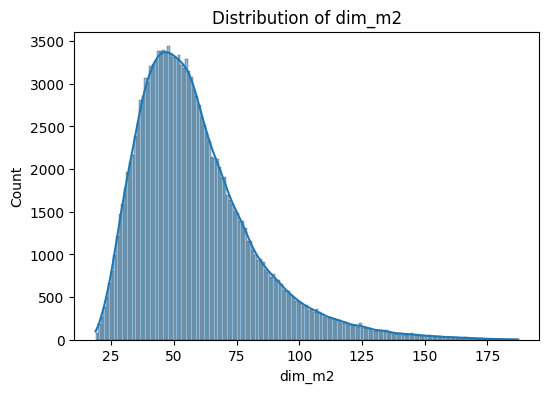

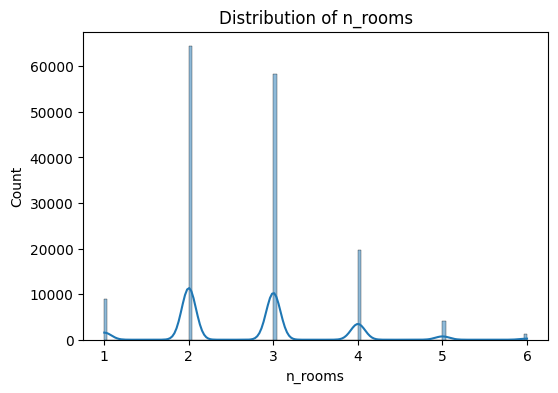

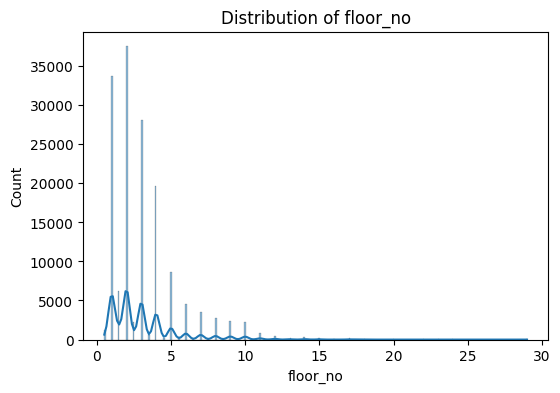

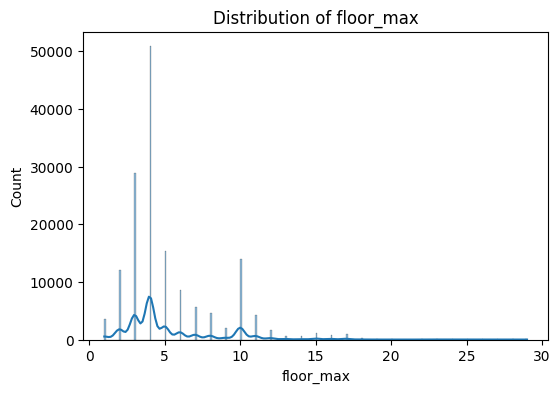

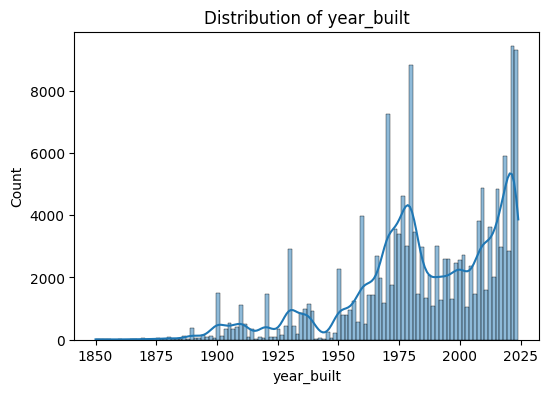

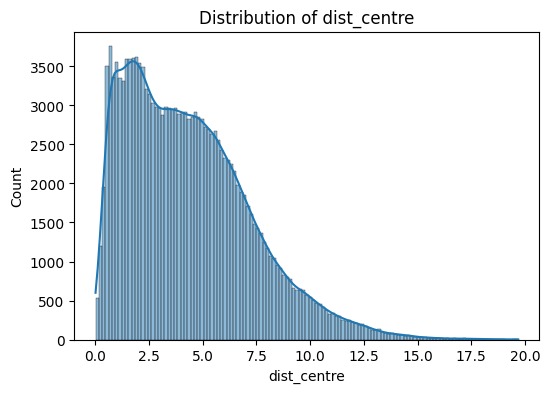

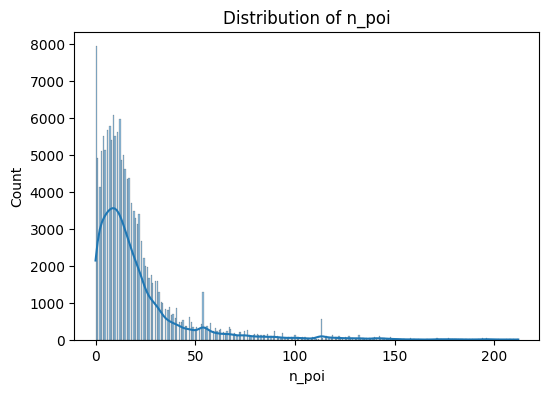

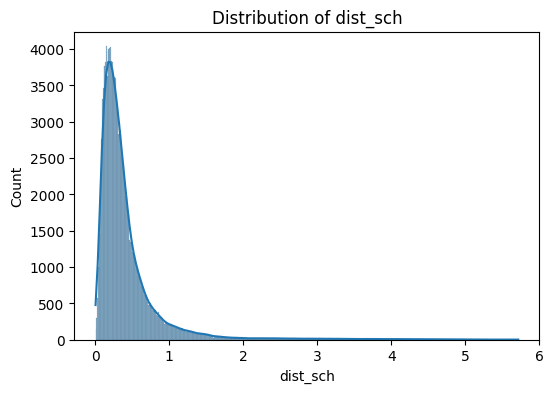

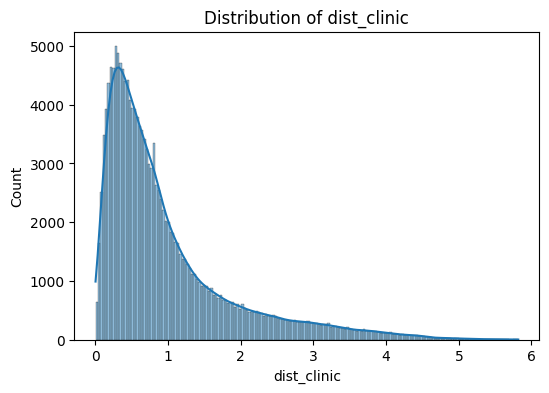

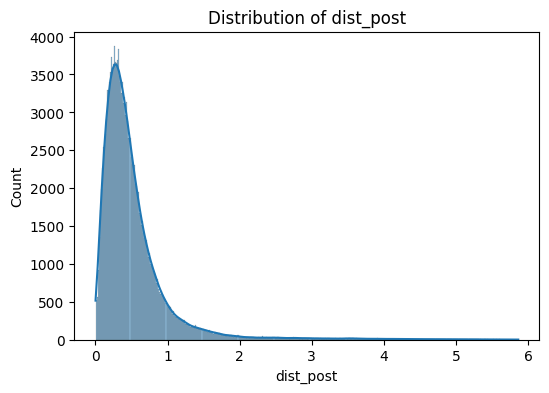

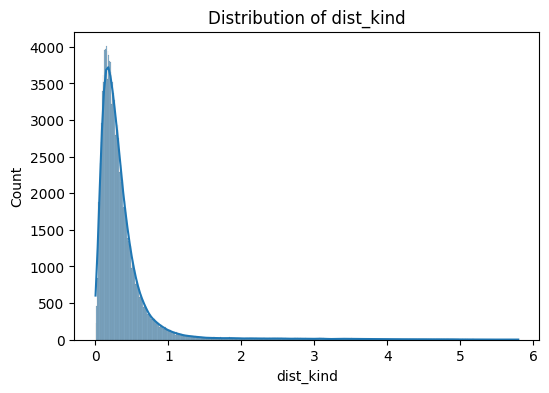

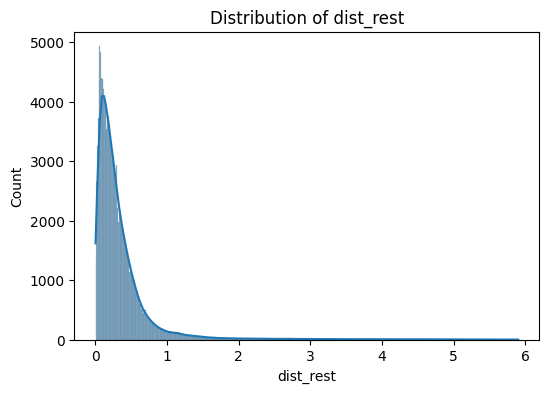

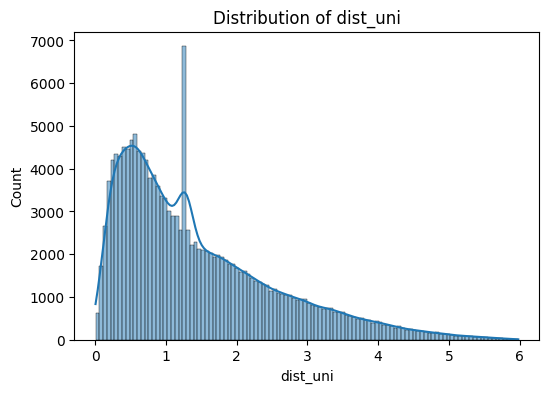

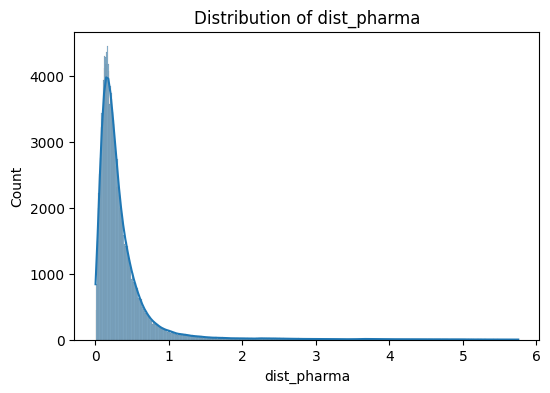

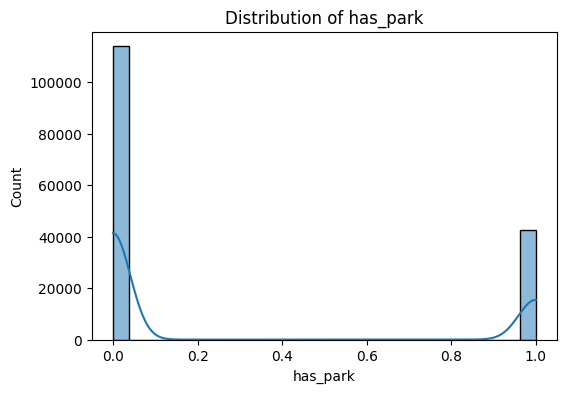

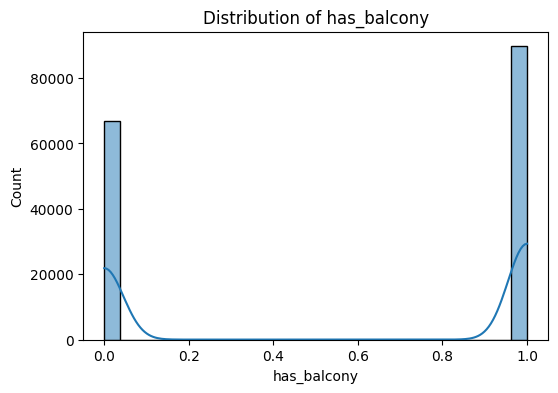

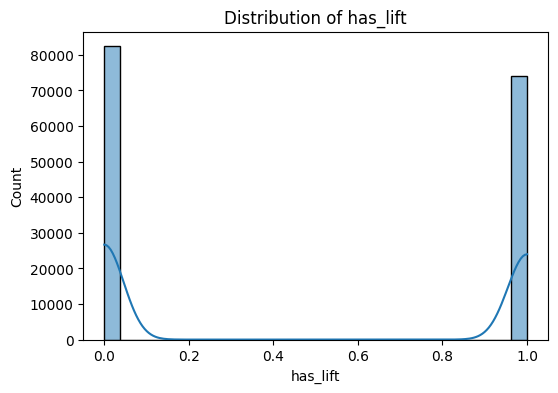

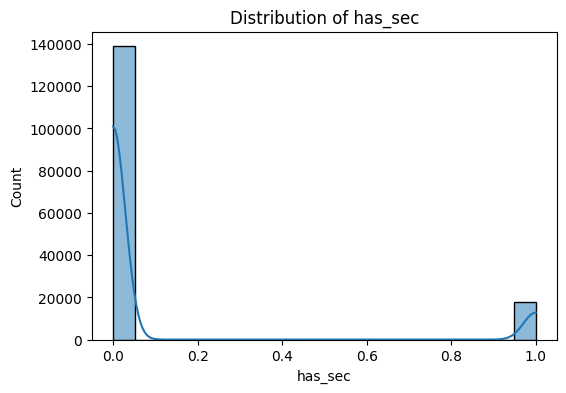

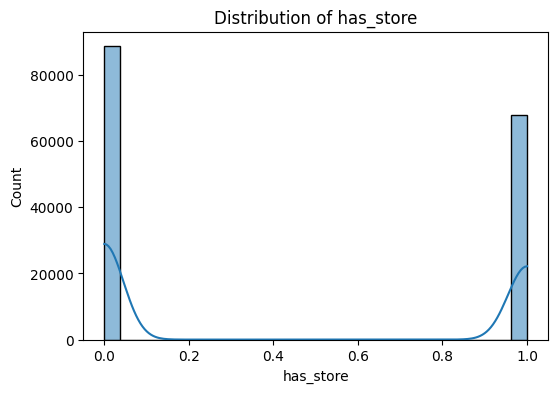

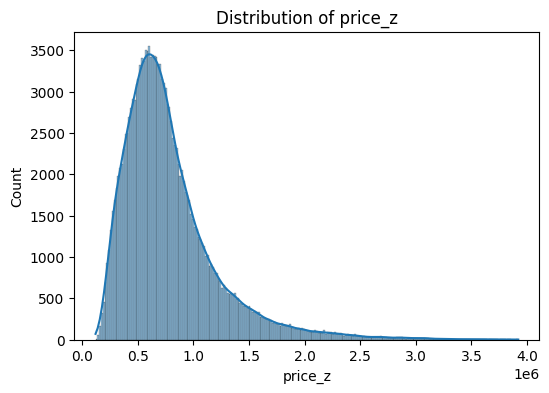

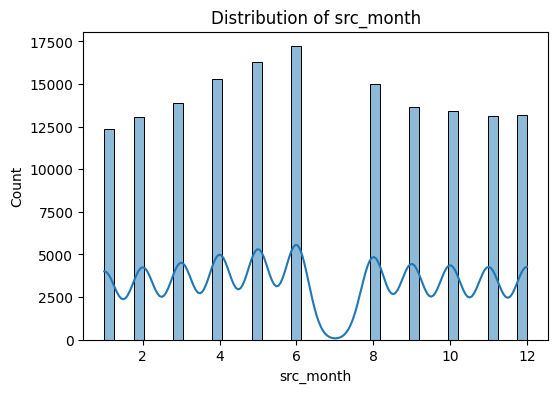

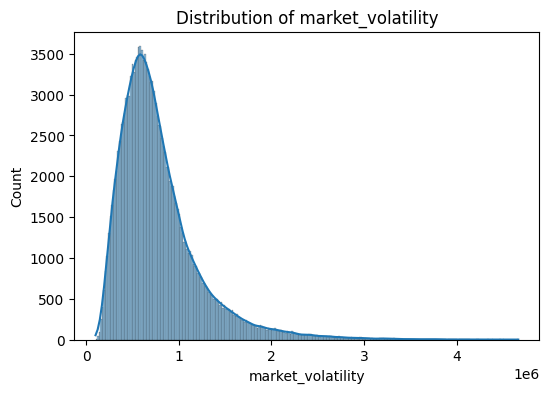

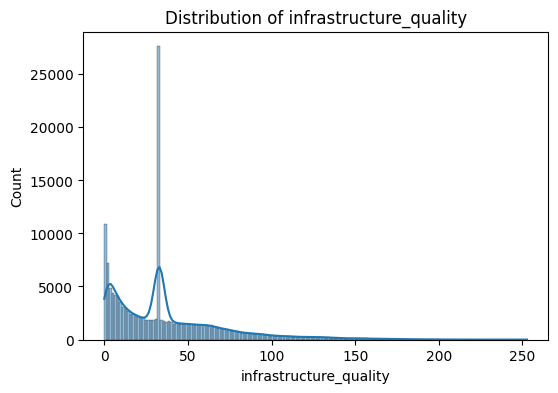

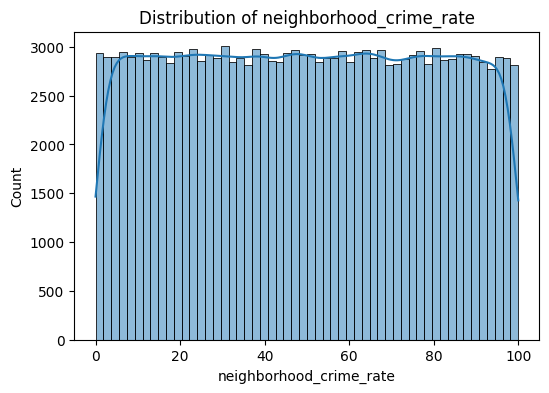

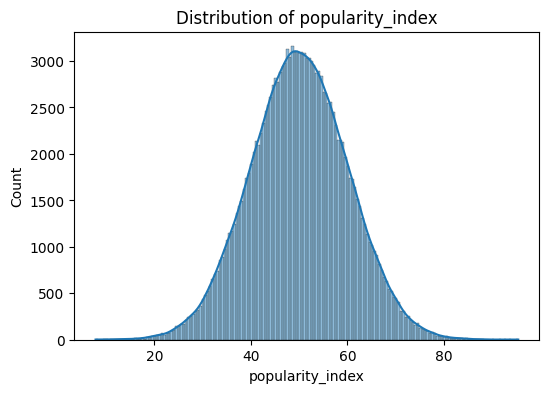

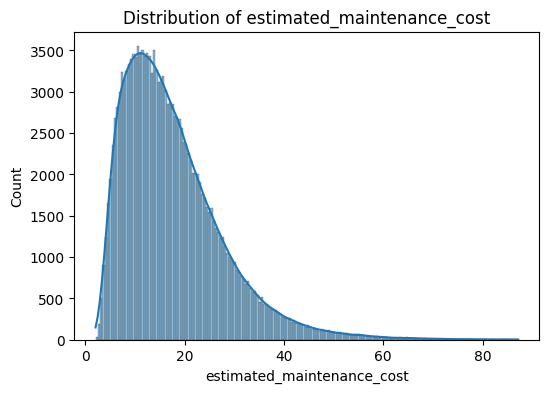

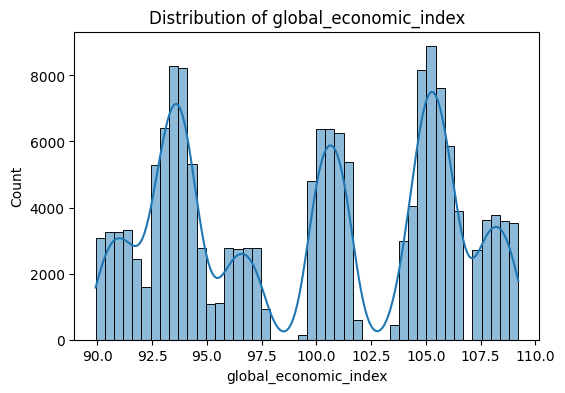

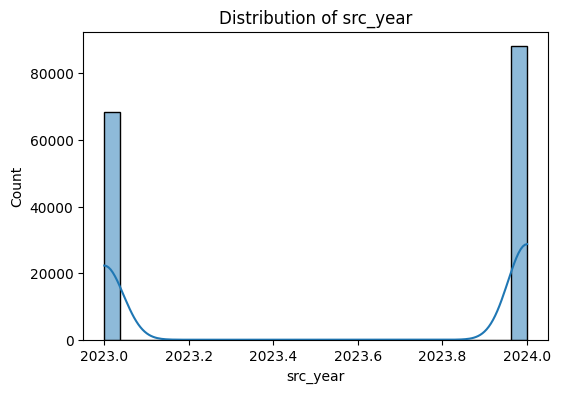

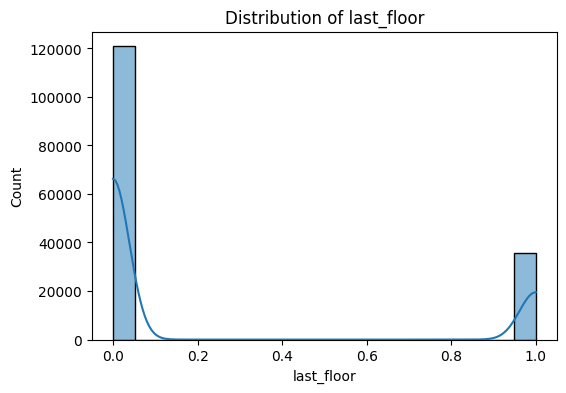

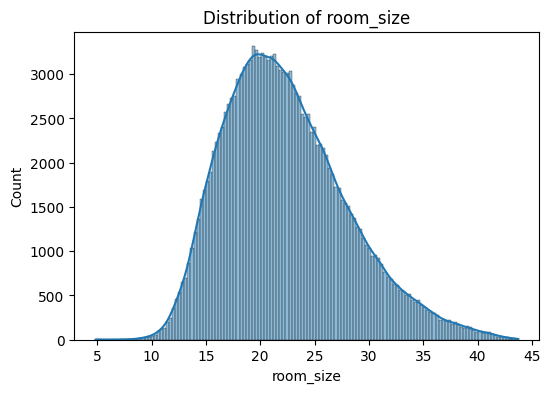

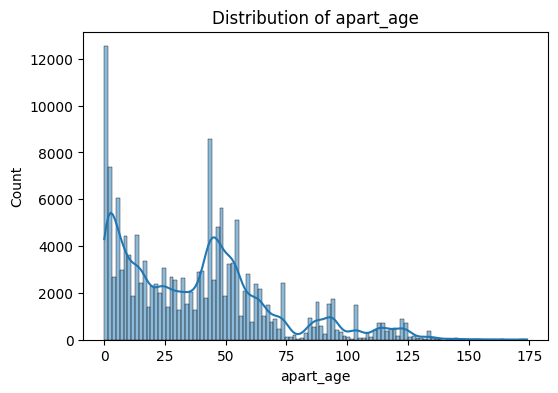

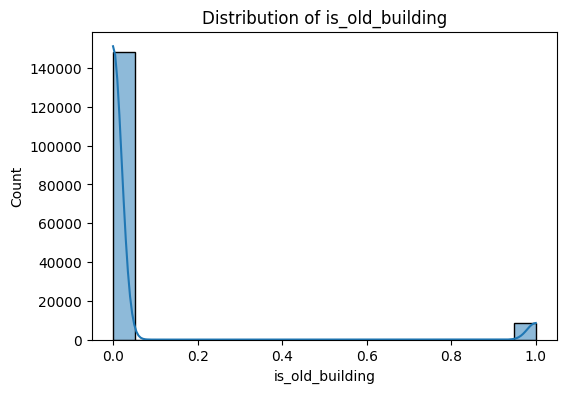

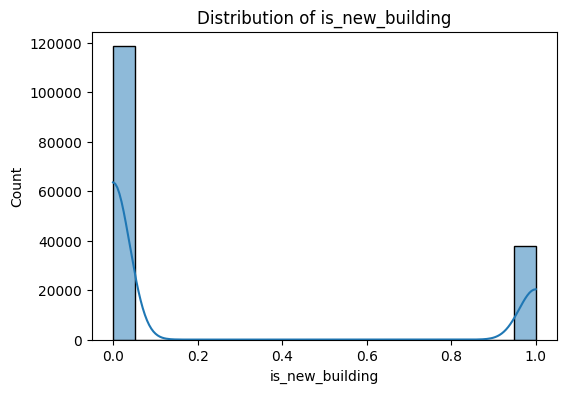

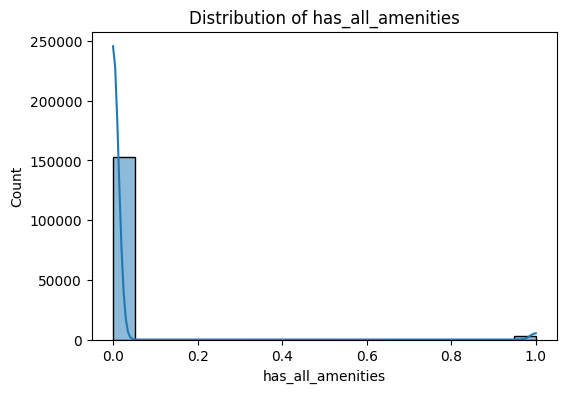

In [27]:
# List of numerical columns
num_cols = df.select_dtypes(include='number').columns

# Plot histograms
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [28]:
skew_vals = df[num_cols].skew().sort_values()
print(skew_vals)

year_built                   -0.881438
has_balcony                  -0.295347
src_year                     -0.254614
global_economic_index        -0.038939
popularity_index             -0.001736
neighborhood_crime_rate       0.002969
src_month                     0.077383
has_lift                      0.107022
has_store                     0.266990
room_size                     0.622114
n_rooms                       0.701467
dist_centre                   0.866919
apart_age                     0.881770
has_park                      1.026185
dist_uni                      1.141970
is_new_building               1.202225
dim_m2                        1.278990
last_floor                    1.300021
estimated_maintenance_cost    1.362868
infrastructure_quality        1.503512
dist_clinic                   1.758296
price_z                       1.840627
floor_max                     1.865876
market_volatility             1.909276
floor_no                      2.266864
has_sec                  

In [29]:
from sklearn.preprocessing import PowerTransformer

vars_to_transform = [
    'dist_centre', 'dist_uni', 'infrastructure_quality',
    'estimated_maintenance_cost', 'dist_clinic', 'dist_post', 'dist_sch',
    'dist_pharma', 'dist_kind', 'dist_rest', 'n_poi', 
]

pt = PowerTransformer(method='yeo-johnson', standardize=True)
df[vars_to_transform] = pt.fit_transform(df[vars_to_transform])

In [30]:
print(df.head())

                  obj_type  dim_m2  n_rooms  floor_no  floor_max  year_built  \
a3a463617a5c0439  0d6c4dfc   45.89      2.0       1.0        4.0      1999.0   
23a92531fcb238b4  0c238f18   27.64      1.0       1.0        2.0      1940.0   
d158671401f9fc34  0d6c4dfc   62.18      2.0       1.0        2.0      2000.0   
280aced4655b7a96  2a6d5c01   53.68      2.0       2.0        4.0      2018.0   
2315fa621e746fe4  2a6d5c01   70.89      3.0       2.0        3.0      2015.0   

                  dist_centre     n_poi  dist_sch  dist_clinic  dist_post  \
a3a463617a5c0439     2.242119 -0.164421  0.897805     0.299197   0.157091   
23a92531fcb238b4    -0.555287  0.173247  0.360707     0.439393  -1.887680   
d158671401f9fc34     1.685608 -0.431313  0.416068     0.743148   0.539052   
280aced4655b7a96     1.743338  0.795279  1.299735     1.260921  -2.033806   
2315fa621e746fe4     1.278655 -0.537558  1.840443     1.297267   1.762367   

                  dist_kind  dist_rest  dist_uni  dist_p

In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Define distance-related variables
distance_vars = [
    'dist_centre', 'dist_sch', 'dist_clinic', 'dist_post', 'dist_kind',
    'dist_rest', 'dist_uni', 'dist_pharma', 'n_poi'
]

# Extract data for PCA
X_dist = df[distance_vars]

# Standardize the distance variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dist)

# Apply PCA
pca = PCA(n_components=1)
accessibility_scores = pca.fit_transform(X_scaled).ravel()

# Assign meta-variable back to the original DataFrame
df['overall_accessibility'] = accessibility_scores

# Show contribution of each feature to the PCA component
print("PCA component loadings (positive → further, negative → closer):")
print(pd.Series(pca.components_[0], index=distance_vars).sort_values())

PCA component loadings (positive → further, negative → closer):
n_poi         -0.438512
dist_kind      0.241474
dist_centre    0.296308
dist_uni       0.317427
dist_post      0.318704
dist_clinic    0.321495
dist_sch       0.341227
dist_pharma    0.343904
dist_rest      0.348141
dtype: float64


In [32]:
df = df.drop(distance_vars, axis = 1)
print(df.head())

                  obj_type  dim_m2  n_rooms  floor_no  floor_max  year_built  \
a3a463617a5c0439  0d6c4dfc   45.89      2.0       1.0        4.0      1999.0   
23a92531fcb238b4  0c238f18   27.64      1.0       1.0        2.0      1940.0   
d158671401f9fc34  0d6c4dfc   62.18      2.0       1.0        2.0      2000.0   
280aced4655b7a96  2a6d5c01   53.68      2.0       2.0        4.0      2018.0   
2315fa621e746fe4  2a6d5c01   70.89      3.0       2.0        3.0      2015.0   

                  own_type  has_park  has_balcony  has_lift  has_sec  \
a3a463617a5c0439  12631efb         1            1         1        0   
23a92531fcb238b4  12631efb         1            1         0        0   
d158671401f9fc34  12631efb         0            1         0        0   
280aced4655b7a96  12631efb         1            0         1        0   
2315fa621e746fe4  12631efb         1            1         1        0   

                  has_store     price_z  src_month  loc_code  \
a3a463617a5c0439      

In [33]:
num_cols = df.select_dtypes(include='number').columns
skew_vals = df[num_cols].skew().sort_values()
print(skew_vals)

year_built                   -0.881438
has_balcony                  -0.295347
src_year                     -0.254614
infrastructure_quality       -0.083395
global_economic_index        -0.038939
estimated_maintenance_cost   -0.004312
popularity_index             -0.001736
neighborhood_crime_rate       0.002969
src_month                     0.077383
has_lift                      0.107022
has_store                     0.266990
overall_accessibility         0.527701
room_size                     0.622114
n_rooms                       0.701467
apart_age                     0.881770
has_park                      1.026185
is_new_building               1.202225
dim_m2                        1.278990
last_floor                    1.300021
price_z                       1.840627
floor_max                     1.865876
market_volatility             1.909276
floor_no                      2.266864
has_sec                       2.455248
is_old_building               3.970192
has_all_amenities        

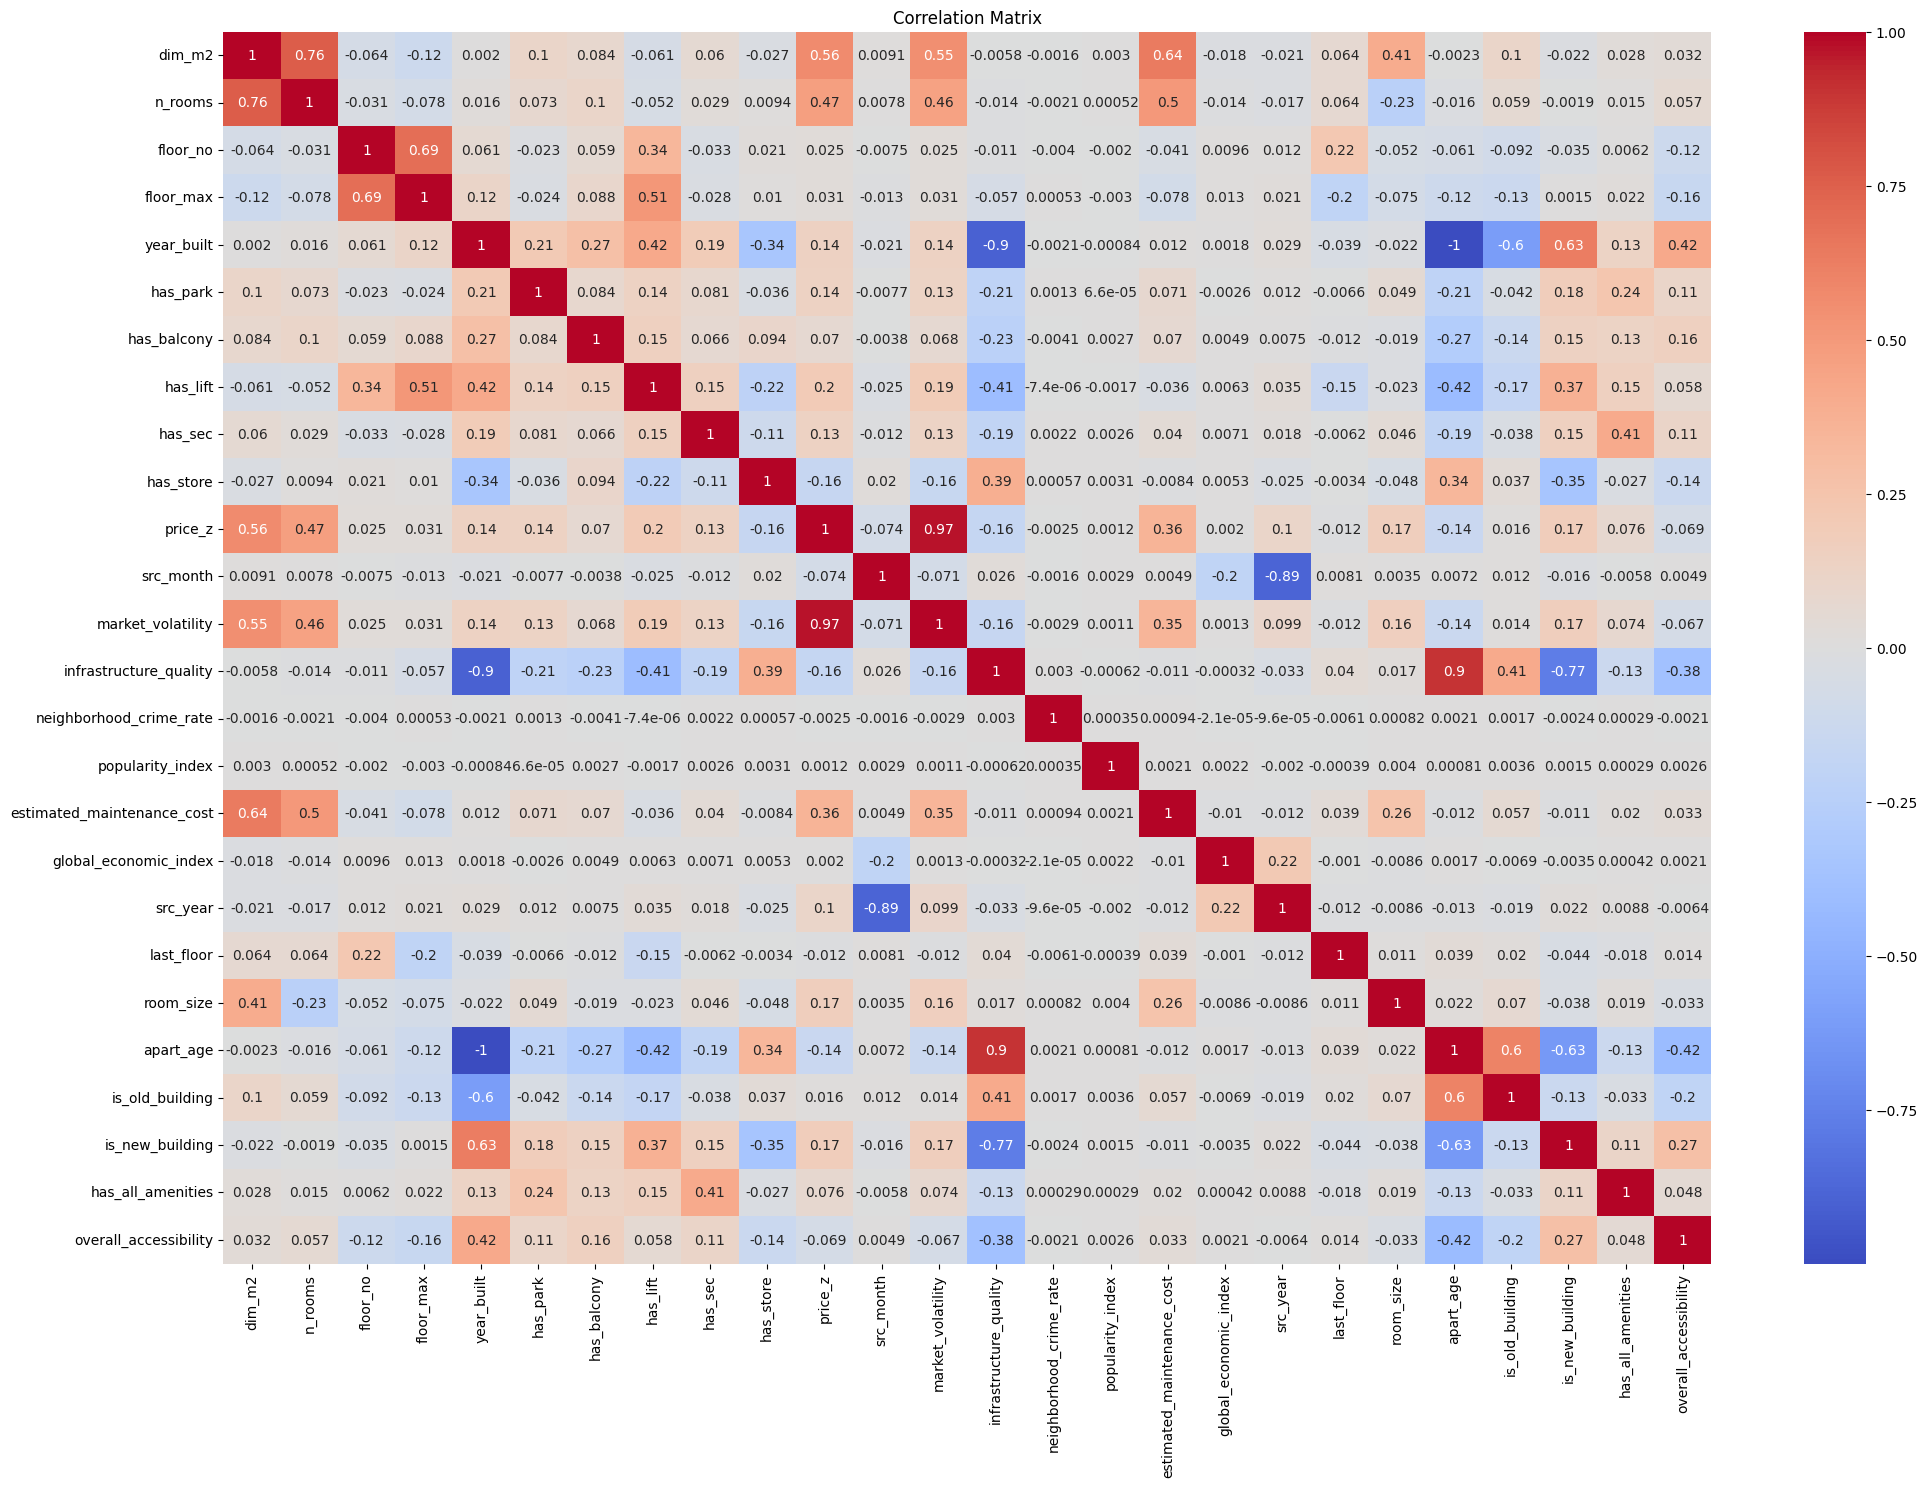

In [34]:
corr_columns = df.drop(columns = ['obj_type','loc_code', 'own_type'])

plt.figure(figsize=(24, 16))
sns.heatmap(corr_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [35]:
df['log_price'] = np.log(df['price_z'])

In [36]:
# turing year into categorical and one hot encoding. Dropping first to omit collinearity

bins = [0, 1900, 1920, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030]
labels = [
    'before_1900', '1900_1920', '1920_1940', '1940_1950', '1950_1960', '1960_1970',
    '1970_1980', '1980_1990', '1990_2000', '2000_2010', '2010_2020', 'after_2020'
]

df['year_built_cat'] = pd.cut(df['year_built'], bins=bins, labels=labels, right=False)

df = pd.get_dummies(df, columns=['year_built_cat'], prefix='', prefix_sep='', drop_first=True)


df = df.drop(columns=['year_built'], axis =1)



In [37]:
# turing obj_type into dummies - only 4 options

df = pd.get_dummies(df, columns=['obj_type'], prefix='obj_type', drop_first=True)

# # similar for own_type
df = pd.get_dummies(df, columns=['own_type'], prefix='own_type', drop_first=True)

# # and finally for loc_code
df = pd.get_dummies(df, columns=['loc_code'], prefix='loc_code', drop_first=True)

# # and for src_year, why not
df = pd.get_dummies(df, columns=['src_year'], prefix='src_year', drop_first=True)

#df = df.drop(columns = ['obj_type', 'own_type', 'loc_code', 'src_year'])

In [38]:
df.head()

,dim_m2,n_rooms,floor_no,floor_max,has_park,has_balcony,has_lift,has_sec,has_store,price_z,src_month,market_volatility,infrastructure_quality,neighborhood_crime_rate,popularity_index,estimated_maintenance_cost,global_economic_index,last_floor,room_size,apart_age,is_old_building,is_new_building,has_all_amenities,overall_accessibility,log_price,1900_1920,1920_1940,1940_1950,1950_1960,1960_1970,1970_1980,1980_1990,1990_2000,2000_2010,2010_2020,after_2020,obj_type_0d6c4dfc,obj_type_2a6d5c01,obj_type_other,own_type_4e625087,own_type_bfb8fe10,loc_code_143768f7,loc_code_378f340c,loc_code_3cb4aaff,loc_code_533f6886,loc_code_570cb745,loc_code_64a58667,loc_code_6900ba06,loc_code_693f303c,loc_code_765f79ed,loc_code_81b10147,loc_code_8d5a4f0c,loc_code_a6d54bd1,loc_code_e0cff11b,loc_code_ece39f3d,src_year_2024
a3a463617a5c0439,45.89,2.0,1.0,4.0,1,1,1,0,1,519626.21,9,501710.76,-0.553050,95.39,44.51,-0.165329,100.291946,0,22.945,24.0,0,0,0,1.465493,13.160865,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
23a92531fcb238b4,27.64,1.0,1.0,2.0,1,1,0,0,0,162959.26,4,147763.87,1.673214,46.17,56.25,-1.190179,91.315644,0,27.640,84.0,0,0,0,-0.738866,12.001256,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
d158671401f9fc34,62.18,2.0,1.0,2.0,0,1,0,0,1,1167571.51,10,1042847.59,0.137910,18.94,50.36,0.576055,93.681619,0,31.090,23.0,0,0,0,2.194918,13.970437,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
280aced4655b7a96,53.68,2.0,2.0,4.0,1,0,1,0,0,907071.16,1,728839.39,-0.973734,11.84,46.69,-1.124044,94.192062,0,26.840,6.0,0,1,0,0.392663,13.717976,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
2315fa621e746fe4,70.89,3.0,2.0,3.0,1,1,1,0,0,1080383.19,11,1263171.15,-0.715781,89.64,45.60,-0.982982,96.166051,0,23.630,8.0,0,1,0,1.428269,13.892826,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156454 entries, a3a463617a5c0439 to 53618f0f04ae1dbd
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   dim_m2                      156454 non-null  float64
 1   n_rooms                     156454 non-null  float64
 2   floor_no                    156454 non-null  float64
 3   floor_max                   156454 non-null  float64
 4   has_park                    156454 non-null  int64  
 5   has_balcony                 156454 non-null  int64  
 6   has_lift                    156454 non-null  int64  
 7   has_sec                     156454 non-null  int64  
 8   has_store                   156454 non-null  int64  
 9   price_z                     156454 non-null  float64
 10  src_month                   156454 non-null  int32  
 11  market_volatility           156454 non-null  float64
 12  infrastructure_quality      156454 non-null  float64

In [40]:
df.to_csv("new_train_df.csv", index=False)